# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Open Data

In [2]:
df = pd.read_csv('HSP.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Membersihkan data

In [3]:
# Melihat daftar fitur yang memiliki baris null
null_features = df.columns[df.isna().any()].tolist()
print(null_features)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)
df["Alley"].fillna("None", inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["BsmtQual"].fillna("NoBasement", inplace=True)
df["BsmtCond"].fillna("NoBasement", inplace=True)
df["BsmtExposure"].fillna("NoExposure", inplace=True)
df["BsmtFinType1"].fillna("NoBasement", inplace=True)
df["BsmtFinType2"].fillna("NoBasement", inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)
df["FireplaceQu"].fillna("NoFireplace", inplace=True)
df["GarageType"].fillna("NoGarage", inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0], inplace=True)
df["GarageFinish"].fillna("NoGarage", inplace=True)
df["GarageQual"].fillna("NoGarage", inplace=True)
df["GarageCond"].fillna("NoGarage", inplace=True)
df["PoolQC"].fillna("NoPool", inplace=True)
df["Fence"].fillna("NoFence", inplace=True)
df["MiscFeature"].fillna("NoMiscFeature", inplace=True)

C:\Users\irfan\AppData\Local\Temp\ipykernel_25972\1015856296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)
C:\Users\irfan\AppData\Local\Temp\ipykernel_25972\1015856296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

# Preprocessing Data dan Feature Engineering

In [7]:
# Membagi data fitur dan target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [8]:
# Memisahkan fitur numerik dan kategori
fitur_numerik = X.select_dtypes(include=["int64", "float64"])

In [9]:
# Normalisasi fitur numerik
scaler = RobustScaler()
numerik_scaler = scaler.fit_transform(fitur_numerik)
numerik_scaler_df = pd.DataFrame(numerik_scaler, columns=fitur_numerik.columns)

## Encode fitur kategori

In [10]:
mszoning_mapping = {
    'RL': 4,    
    'RM': 3,    
    'C (all)': 2, 
    'FV': 1,    
    'RH': 0     
}
df['MSZoning'] = df['MSZoning'].map(mszoning_mapping)

In [11]:
lotshape_mapping = {
    'Reg': 3,    
    'IR1': 2,    
    'IR2': 1,    
    'IR3': 0     
}
df['LotShape'] = df['LotShape'].map(lotshape_mapping)

In [12]:
landcontour_mapping = {
    'Lvl': 3,    
    'Bnk': 2,    
    'Low': 1,    
    'HLS': 0     
}
df['LandContour'] = df['LandContour'].map(landcontour_mapping)

In [13]:
landslope_mapping = {
    'Gtl': 2,    
    'Mod': 1,    
    'Sev': 0     
}
df['LandSlope'] = df['LandSlope'].map(landslope_mapping)    

In [14]:
condition1_mapping = {
    'Norm': 8,    
    'Feedr': 7,   
    'PosN': 6,    
    'Artery': 5,  
    'RRAe': 4,    
    'RRNn': 3,    
    'RRAn': 2,    
    'PosA': 1,    
    'RRNe': 0     
}
df['Condition1'] = df['Condition1'].map(condition1_mapping)

In [15]:
condition2_mapping = {
    'Norm': 7,    
    'Artery': 6,  
    'RRNn': 5,    
    'Feedr': 4,   
    'PosN': 3,    
    'PosA': 2,    
    'RRAn': 1,    
    'RRAe': 0     
}
df['Condition2'] = df['Condition2'].map(condition2_mapping)

In [16]:
exterQual_mapping = {
    'Ex' : 3,
    'Gd' : 2,
    'TA' : 1,
    'Fa' : 0
}
df['ExterQual'] = df['ExterQual'].map(exterQual_mapping)

In [17]:
exterCond_mapping = {
    'Ex': 4,    
    'Gd': 3,    
    'TA': 2,    
    'Fa': 1,    
    'Po': 0     
}
df['ExterCond'] = df['ExterCond'].map(exterCond_mapping)

In [18]:
bsmtQual_mapping = {
    'Ex' : 4,
    'Gd' : 3,
    'TA' : 2,
    'Fa' : 1,
    'NoBasement' : 0
}
df['BsmtQual'] = df['BsmtQual'].map(bsmtQual_mapping)

In [19]:
bsmtCond_mapping = {
    'Gd': 4,    
    'TA': 3,    
    'Fa': 2,    
    'Po': 1,
    'NoBasement' : 0
}
df['BsmtCond'] = df['BsmtCond'].map(bsmtCond_mapping)

In [20]:
bsmtExposure_mapping = {
    'Gd': 4,        
    'Av': 3,        
    'Mn': 2,        
    'No': 1,        
    'NoExposure': 0 
}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmtExposure_mapping)

In [21]:
kitchenQual_mapping = {
    'Ex' : 3,
    'Gd' : 2,
    'TA' : 1,
    'Fa' : 0
}
df['KitchenQual'] = df['KitchenQual'].map(kitchenQual_mapping)

In [22]:
garageQual_mapping = {
    'Ex': 5,    
    'Gd': 4,    
    'TA': 3,    
    'Fa': 2,   
    'Po': 1,
    'NoGarage' : 0
}
df['GarageQual'] = df['GarageQual'].map(garageQual_mapping)

In [23]:
garageCond_mapping = {
    'Ex': 5,    
    'Gd': 4,    
    'TA': 3,    
    'Fa': 2,    
    'Po': 1,
    'NoGarage' : 0
}
df['GarageCond'] = df['GarageCond'].map(garageCond_mapping)

In [24]:
salecondition_mapping = {
    'Normal': 5,     
    'Abnorml': 4,    
    'Partial': 3,    
    'AdjLand': 2,    
    'Alloca': 1,     
    'Family': 0      
}
df['SaleCondition'] = df['SaleCondition'].map(salecondition_mapping)

In [25]:
# Memisahkan fitur kategori terurut dan tidak
kategori_urut = ['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'ExterQual', 'ExterCond', 'BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond', 'SaleCondition']
df_ordinal = df[kategori_urut]

In [26]:
# Encoding fitur categorical non ordinal
encode = pd.get_dummies(df, columns=['Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType'])

In [27]:
# Gabungkan semua fitur yang sudah di preprocess
df_final = pd.concat([numerik_scaler_df, encode, df_ordinal], axis=1)


# Melakukan Feature Selection

In [28]:
df_fitur_target = pd.concat([df_final, y], axis=1)

In [40]:
import openpyxl

# Menghitung matriks korelasi
correlation_matrix = df_fitur_target.corr()
print(correlation_matrix['SalePrice'] > 0.2)
high_correlation = correlation_matrix['SalePrice'] > 0.2
high_correlation.to_csv('korelasi_salePrice.csv')

               SalePrice  SalePrice
Id                 False      False
MSSubClass         False      False
LotFrontage         True       True
LotArea             True       True
OverallQual         True       True
...                  ...        ...
KitchenQual         True       True
GarageQual          True       True
GarageCond          True       True
SaleCondition      False      False
SalePrice           True       True

[292 rows x 2 columns]


In [41]:
# Membuat dataset baru dari hasil correlation csv
df_corr = pd.read_csv('korelasi_salePrice.csv')
df_corr.head()

,Unnamed: 0,SalePrice,SalePrice.1
0,Id,False,False
1,MSSubClass,False,False
2,LotFrontage,True,True
3,LotArea,True,True
4,OverallQual,True,True


In [42]:
# Memilih semua baris yang memiliki nilai True
df_corr_true = df_corr[(df_corr['SalePrice'] == True)]
df_corr_true = df_corr_true.drop_duplicates()
df_corr_true = df_corr_true.drop(['SalePrice', 'SalePrice.1'], axis=1)


In [43]:
# Membuat baris baris tersebut menjadi sebuah list
list_corr = df_corr_true['Unnamed: 0'].tolist()
print(len(list_corr))

50


In [44]:
# Meng-copy list tersebut menjadi sebuah dataset berisi list yang dipilih, dan menghapus kolom yang duplikat
df_final_concat = df_fitur_target[list_corr]
df_final_concat = df_final_concat.loc[:, ~df_final_concat.columns.duplicated()]
df_final_concat.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond', 'SalePrice',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_2Story', 'RoofStyle_Hip', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_Stone', 'Foundation_PConc',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'CentralAir_Y', 'Electrical_SBrkr',
       'FireplaceQu_Ex', 'FireplaceQu_Gd', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageFinish_Fin', 'PavedDrive_Y',
       'SaleType_New'],
      dtype='object')

# Melatih dan membuat model

In [45]:
# Memilah antara fitur dan target
X = df_final_concat.drop('SalePrice', axis=1) # Fitur
y = df_final_concat['SalePrice'] # Target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.8334316125435668
Test Accuracy:  0.8583159772933779


In [49]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1086762672.5062988
Mean Absolute Error (MAE): 20618.823895033645
R-squared (R2): 0.8583159772933779


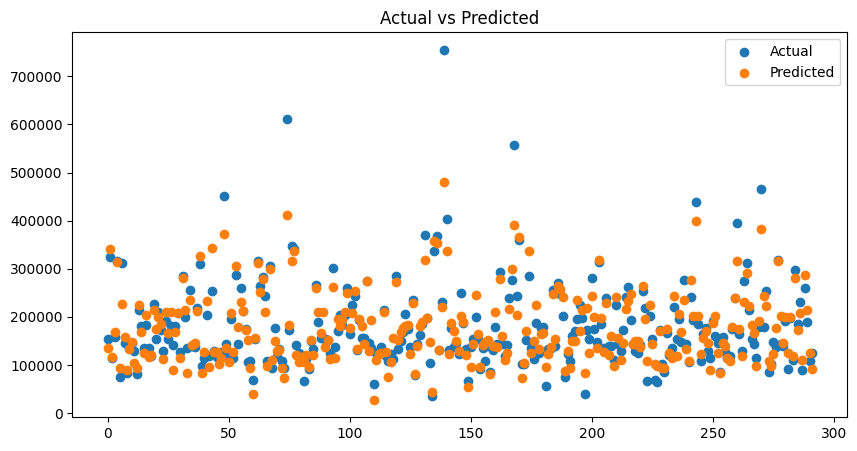

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


# TestCase

In [54]:
test_data = pd.DataFrame({
    'LotFrontage': [70],
    'LotArea': [8450],
    'OverallQual': [7],
    'YearBuilt': [2003],
    'YearRemodAdd': [2003],
    'MasVnrArea': [196],
    'BsmtFinSF1': [706],
    'BsmtUnfSF': [150],
    'TotalBsmtSF': [856],
    '1stFlrSF': [856],
    '2ndFlrSF': [854],
    'GrLivArea': [1710],
    'BsmtFullBath': [1],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [8],
    'Fireplaces': [1],
    'GarageYrBlt': [2003],
    'GarageCars': [2],
    'GarageArea': [548],
    'WoodDeckSF': [0],
    'OpenPorchSF': [61],
    'ExterQual': [5],
    'BsmtQual': [4],
    'BsmtCond': [3],
    'BsmtExposure': [2],
    'KitchenQual': [4],
    'GarageQual': [3],
    'GarageCond': [3],
    'Neighborhood_NoRidge': [1],
    'Neighborhood_NridgHt': [0],
    'Neighborhood_StoneBr': [0],
    'HouseStyle_2Story': [1],
    'RoofStyle_Hip': [0],
    'Exterior1st_VinylSd': [1],
    'Exterior2nd_VinylSd': [1],
    'MasVnrType_Stone': [1],
    'Foundation_PConc': [1],
    'BsmtFinType1_GLQ': [1],
    'HeatingQC_Ex': [1],
    'CentralAir_Y': [1],
    'Electrical_SBrkr': [1],
    'FireplaceQu_Ex': [0],
    'FireplaceQu_Gd': [1],
    'GarageType_Attchd': [1],
    'GarageType_BuiltIn': [0],
    'GarageFinish_Fin': [0],
    'PavedDrive_Y': [1],
    'SaleType_New': [0]
})

In [53]:
data_numerik = test_data.drop(columns=['ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                                     'Neighborhood_StoneBr','HouseStyle_2Story','RoofStyle_Hip','Exterior1st_VinylSd','Exterior2nd_VinylSd','MasVnrType_Stone','Foundation_PConc',
                                     'BsmtFinType1_GLQ','HeatingQC_Ex','CentralAir_Y','Electrical_SBrkr','FireplaceQu_Ex','FireplaceQu_Gd','GarageType_Attchd','GarageType_BuiltIn',
                                     'GarageFinish_Fin','PavedDrive_Y','SaleType_New'], axis=1)

data_kategori = test_data[['ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                                     'Neighborhood_StoneBr','HouseStyle_2Story','RoofStyle_Hip','Exterior1st_VinylSd','Exterior2nd_VinylSd','MasVnrType_Stone','Foundation_PConc',
                                     'BsmtFinType1_GLQ','HeatingQC_Ex','CentralAir_Y','Electrical_SBrkr','FireplaceQu_Ex','FireplaceQu_Gd','GarageType_Attchd','GarageType_BuiltIn',
                                     'GarageFinish_Fin','PavedDrive_Y','SaleType_New']]

data_numerik_scaled = scaler.fit_transform(data_numerik)
data_numerik_scaled = pd.DataFrame(data_numerik_scaled, columns=data_numerik.columns)
test_data_concat = pd.concat([data_numerik_scaled, data_kategori], axis=1)
predicted_price = model.predict(test_data_concat)
print("Prediksi harga rumah : ", predicted_price)

Prediksi harga rumah :  [272918.10620835]
